## Desafío 3: Aplicar modelos de clasificación
#### Cristian Torres

### Data Set: Video Games Rating By 'ESRB'
Se elige un data set de clasificación de video juegos ESRB (Entertainment Software Rating Board).
Es un sistema de clasificación independiende, que califica juegos según sus contenidos de violencia física o verbal y otros elementos como el contenido sexual.
Su intención es ayudar a los consumidores a elegir los videojuegos que son correctos para su familia (idea que surgió con la aparición de Mortal Kombat).

#### Sus clasificaciones son:
- E - Everyone
- E 10+ (ET) - Everyone 10+
- T - Teen
- M	- Mature

La columna consola indica si el juego es exclusivo de PS4(0) o de PS4 y X-Box One(1)

Para más información: https://www.kaggle.com/imohtn/video-games-rating-by-esrb

---
Comenzamos cargando las librerías que vamos a usar.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score 
import statsmodels.api as sm

#librerias para clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree

El data set ya viene dividido en dos archivos Test y Train, pero para aplicar lo aprendido vamos a concatenar ambos archivos, vamos a hacer un análisis exploratorio y luego vamos a aplicar lo aprendido para dividirlo nuevamente.

In [2]:
#cargamos los archivos
df1 = pd.read_csv('test_esrb.csv')
df2 = pd.read_csv('Video_games_esrb_rating.csv')

In [3]:
#concatenamos
df = pd.concat([df1, df2], axis=0)
df.reset_index(inplace=True, drop=True)
#revisamos los tamaños de los dataframes
print(df1.shape)
print(df2.shape)
print(df.shape)
df.head(3)

(500, 34)
(1895, 34)
(2395, 34)


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


## Exploracion de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

In [5]:
#Observamos que todas las variables tienen valores binarios, a excepción de el nombre del juego y la variable a predecir.
for col in df:
    print(df[col].unique())

['Still Time' 'Surf World Series' 'The Metronomicon: Slay the Dance Floor'
 ... 'SENRAN KAGURA Peach Beach Splash' 'Sneaky Bears' 'SPARC']
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
['T' 'E' 'ET' 'M']


In [6]:
df.esrb_rating.value_counts()

T     873
ET    529
E     516
M     477
Name: esrb_rating, dtype: int64

#### Dropeamos la columna "title" (nombre del juego), ya que no nos sirve.

In [7]:
df = df.drop("title", axis = 1)

**Revisamos un poco la distribucion de los datos**

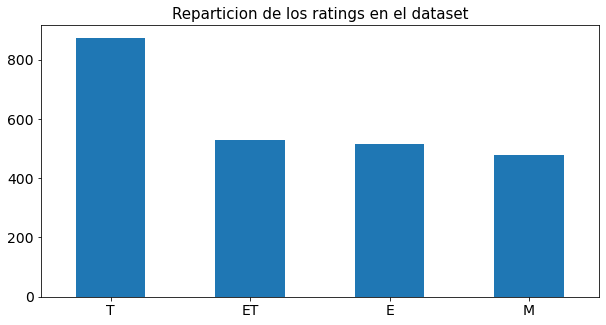

In [8]:
df['esrb_rating'].value_counts().plot.bar(figsize = (10,5))
plt.xticks(rotation=0)
plt.title('Reparticion de los ratings en el dataset', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Hacemos un gráfico para observar correlaciones.**

<AxesSubplot:>

<Figure size 1080x864 with 0 Axes>

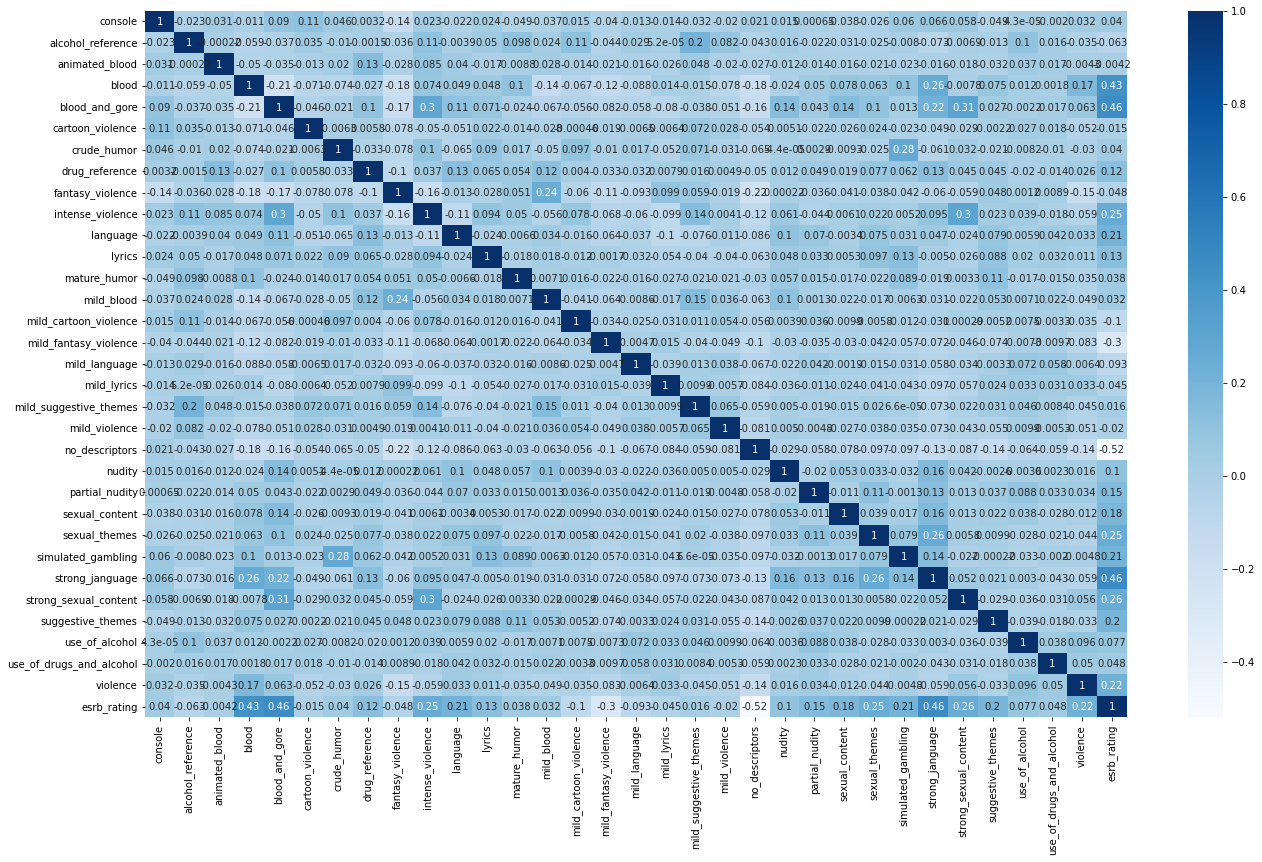

In [9]:
plt.figure(figsize=(15, 12))

# Reemplazamos las letras por números para poder realizar el grafico correctamente.
df_graf = df.copy()
df_graf.esrb_rating = df_graf['esrb_rating'].replace({'E' : 0,
                                                      'ET': 1,
                                                      'T' : 2,
                                                      'M' : 3})
plt.figure(figsize = (22, 13))
correlacion = df_graf.corr()
sns.heatmap(correlacion, cmap = "Blues", annot=True)

Podemos observar que como es de esperarse, hay una fuerte correlación entre la clasificación y variables como: 
- strong_language
- intense_violence
- blood
- blood_and_gore

Lo cual significa que cuanto mas se vea este tipo de elementos en el videojuego, mas alto sera el rating.



---
# Dividimos los sets para entrenamiento y testeo.

In [10]:
df.esrb_rating.value_counts()/df.shape[0]*100

T     36.450939
ET    22.087683
E     21.544885
M     19.916493
Name: esrb_rating, dtype: float64

Vemos que la distribucion de los datos es bastante pareja, pero para tener una distribución pareja vamos a estratificar.

También observamos anteriormente que todas las variables de train son binarias, por lo que no vamos a normalizar.

In [11]:
X = df.drop("esrb_rating", axis=1)
y = df.esrb_rating

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=4)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1796, 32)

(599, 32)

(1796,)

(599,)

**Creamos los folds para Cross Validation**

In [13]:
folds = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)

**creamos un diccionario vacio para luego almanacenar los scores**

In [14]:
accuracy_dict = {}

---

## Modelos de Clasificacion

---
## Naive Bayes

En este caso vamos a aplicar Naive Bayes Bernoulli, ya que todas las features son binarias.

Instanciamos el modelo

In [15]:
bnb = BernoulliNB()

Definimos los hiperparámetros.

In [16]:
param_grid_bnb = {'alpha' : [0, 1],
                  'fit_prior' : [True, False]}
print(param_grid_bnb)

{'alpha': [0, 1], 'fit_prior': [True, False]}


Instanciamos el método GridSearchCV.

In [17]:
grid_bnb = GridSearchCV(bnb, param_grid_bnb, cv=folds, scoring='accuracy')

Fiteamos el modelo

In [18]:
grid_bnb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3, shuffle=True),
             estimator=BernoulliNB(),
             param_grid={'alpha': [0, 1], 'fit_prior': [True, False]},
             scoring='accuracy')

Vemos cual fue la mejor combinación de hiperparámetros.

In [19]:
grid_bnb.best_estimator_

BernoulliNB(alpha=0, fit_prior=False)

Vemos una tabla para comparar bien los resultados

In [20]:
df_bnb = pd.DataFrame(grid_bnb.cv_results_)
df_bnb[['param_alpha', 'param_fit_prior', 'mean_test_score']]

,param_alpha,param_fit_prior,mean_test_score
0,0,True,0.834631
1,0,False,0.842430
2,1,True,0.830180
3,1,False,0.838523


#### Almacenamos en una variable el mejor score obtenido con Bernoulli Naive Bayes

In [21]:
bnb_accuracy = grid_bnb.best_score_
accuracy_dict['NaiveBayes'] = [bnb_accuracy]
bnb_accuracy

0.8424301675977655

---
## Logistic Regression

Instanciamos el modelo

In [22]:
lgr = LogisticRegression()

Definimos los hiperparámetros.

In [23]:
c_range = range(1, 31)

param_grid_lgr = dict(C=c_range)
print(param_grid_lgr)

{'C': range(1, 31)}


Instanciamos el método GridSearchCV, como los datos están bastante balanceados vamos a elegir accuracy como métrica.

In [24]:
grid_lgr = GridSearchCV(lgr, param_grid_lgr, cv=folds, scoring='accuracy')

Fiteamos el modelo.

In [25]:
grid_lgr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3, shuffle=True),
             estimator=LogisticRegression(), param_grid={'C': range(1, 31)},
             scoring='accuracy')

Vemos cual fue el coeficiente de regularización que mejor resultado nos dio.

In [26]:
grid_lgr.best_estimator_

LogisticRegression(C=10)

Graficamos los resultados para tener una mejor noción de lo que estimó el modelo.

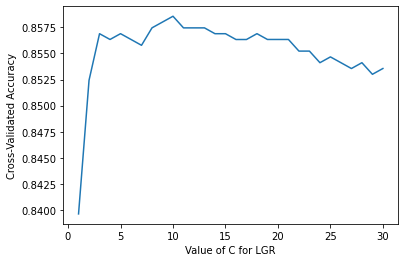

In [27]:
c_scores = grid_lgr.cv_results_['mean_test_score']

plt.plot(c_range, c_scores)
plt.xlabel('Value of C for LGR')
plt.ylabel('Cross-Validated Accuracy');

<b> En este gráfico vemos claramente por que decide tomar como mejor hiperparámetro C=10</b>

<b>Tomamos el mejor resultado y lo almacenamos en un diccionario.</b>

In [28]:
lgr_accuracy = grid_lgr.best_score_
accuracy_dict['LogistcRegression'] = [lgr_accuracy]
lgr_accuracy

0.8585630043451273

---
## KNN

Instanciamos el modelo

In [29]:
knn = KNeighborsClassifier()

Definimos los hiperparámetros.

In [30]:
k_range = list(range(1, 31))
param_grid_knn = {"n_neighbors" : k_range,
                  "weights" : ['uniform', 'distance'],
                  "p" : [1, 2, 3]}
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}


Instanciamos el método GridSearchCV.

In [31]:
grid_knn = GridSearchCV(knn, param_grid_knn, cv=folds, scoring='accuracy')

Fiteamos el modelo.

In [32]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

Vemos cuales fueron los mejores hiperparámetros.

In [33]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=9, weights='distance')

Graficamos el accuracy del modelo en función de la cantidad de vecinos cercanos, con los hiperparametros mas óptimos de p=1 y weights='distance'

In [34]:
df_knn = pd.DataFrame(grid_knn.cv_results_)
mask_knn = (df_knn.param_p == 1) & (df_knn.param_weights == 'distance')
df_knn_optimo = df_knn[mask_knn]

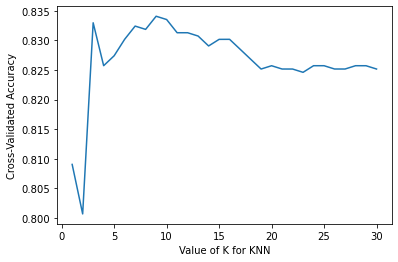

In [35]:
k_scores = df_knn_optimo['mean_test_score']

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [36]:
knn_accuracy = grid_knn.best_score_
accuracy_dict['KNN'] = [knn_accuracy]
knn_accuracy

0.8346337678460584

---
## Decision Tree Classifier

Instanciamos el modelo

In [37]:
d_tree = tree.DecisionTreeClassifier()

Definimos los hiperparámetros a testear.

In [38]:
max_depth = range(10, 40, 2)
ccp_alpha = range(0, 6, 2)


param_grid_d_tree = {'criterion' : ["gini", "entropy"],
                     'max_depth' : max_depth,
                     'max_features' : ["auto", "sqrt", "log2"],
                     'random_state' : [3],
                     'ccp_alpha' : ccp_alpha,
                    }

print(param_grid_d_tree)

{'criterion': ['gini', 'entropy'], 'max_depth': range(10, 40, 2), 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [3], 'ccp_alpha': range(0, 6, 2)}


Instanciamos el método GridSearchCV.

In [39]:
grid_d_tree = GridSearchCV(d_tree, param_grid_d_tree, cv=folds, scoring='accuracy')

Fiteamos el modelo.

In [40]:
grid_d_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': range(0, 6, 2),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 40, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [3]},
             scoring='accuracy')

Vemos cual fue la mejor combinación de hiperparámetros.

In [41]:
best_d_tree = grid_d_tree.best_estimator_
best_d_tree

DecisionTreeClassifier(ccp_alpha=0, max_depth=30, max_features='auto',
                       random_state=3)

Graficamos.

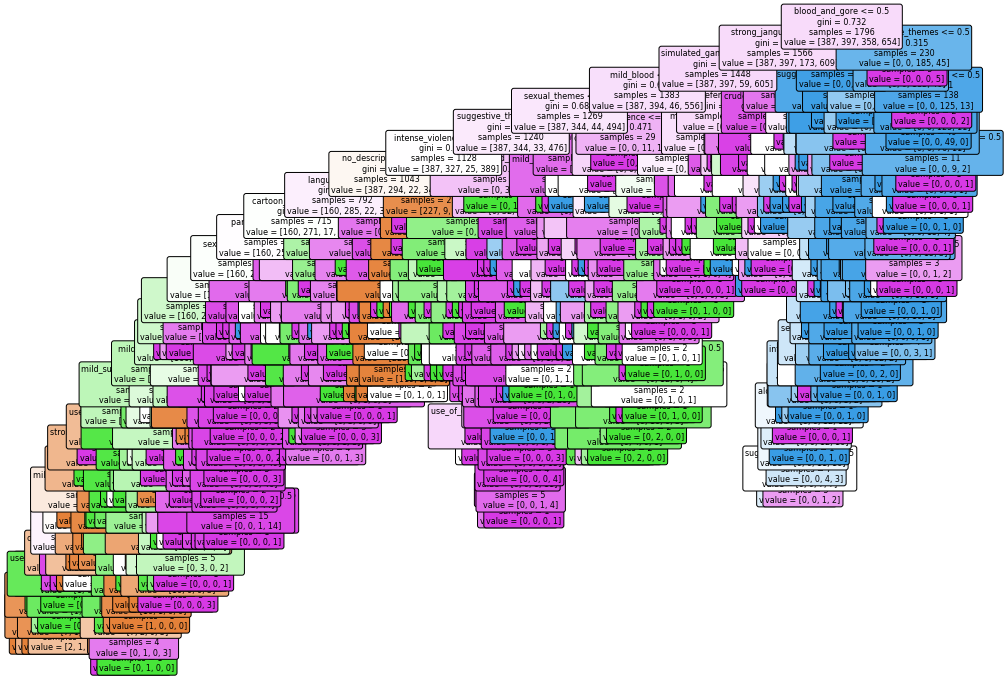

In [42]:
plt.figure(figsize=(16,12))
tree.plot_tree(best_d_tree, feature_names = X.columns, filled=True, rounded=True, fontsize = 8)
plt.show()

#### Almacenamos en una variable el mejor score obtenido con Decision Tree Regressor

In [43]:
d_tree_accuracy = grid_d_tree.best_score_
accuracy_dict['DecisionTreeClassifier'] =[d_tree_accuracy]
d_tree_accuracy

0.8468870266914961

---
## Evaluacion de Modelos

In [44]:
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df

,NaiveBayes,LogistcRegression,KNN,DecisionTreeClassifier
0,0.84243,0.858563,0.834634,0.846887


En base a los resultados obtenidos por los modelos segun la tabla anterior aplicaremos las predicion Logistic Regression ya que fue el que mejor valor nos dio

In [45]:
y_pred = grid_lgr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8514190317195326

### Matriz de confusion

In [46]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[127   0   0   2]
 [  0 100   0  32]
 [  0   0 101  18]
 [  3  21  13 182]]


In [47]:
y_test.value_counts()

T     219
ET    132
E     129
M     119
Name: esrb_rating, dtype: int64

<AxesSubplot:>

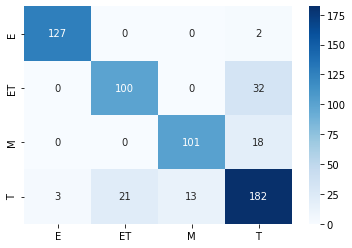

In [48]:
sns.heatmap(confusion,annot=True,cmap='Blues', fmt=".0f", yticklabels=['E','ET', 'M', 'T'], xticklabels=['E','ET', 'M', 'T'])

### Metricas de evaluacion del modelo

- **Reporte General**

In [49]:
print(classification_report(y_test, y_pred)) # support hace referencia al nro. de instancias verdaderas por cada etiqueta (label)

              precision    recall  f1-score   support

           E       0.98      0.98      0.98       129
          ET       0.83      0.76      0.79       132
           M       0.89      0.85      0.87       119
           T       0.78      0.83      0.80       219

    accuracy                           0.85       599
   macro avg       0.87      0.86      0.86       599
weighted avg       0.85      0.85      0.85       599



A continuacion representamos el nivel de importacia que la Regresión Logística le otorga a las features.

Dado que anteriormente usamos grid search para encontrar la mejor combinacion de parámetros y que al parecer la libreria `YellowBrick`, usada para la representacion de los mismos, no admite que le pasemos directamente el modelo de grid search, utilizamos los parámetros obtenidos y hacemos directamente el fit de los datos de entrenamiento.

In [50]:
from yellowbrick.model_selection import FeatureImportances

In [51]:
lgr_graph = LogisticRegression(C=10, random_state=3)
lgr_graph.fit(X_train, y_train)

LogisticRegression(C=10, random_state=3)

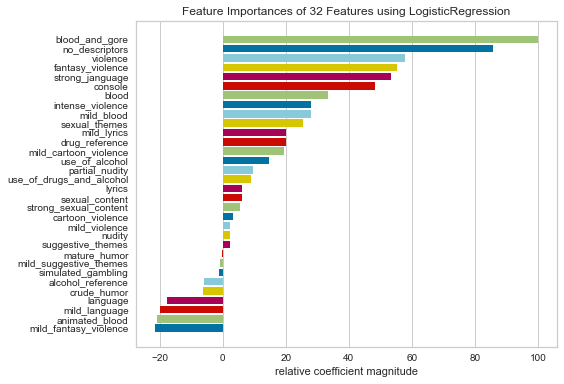

<AxesSubplot:title={'center':'Feature Importances of 32 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [52]:
viz = FeatureImportances(lgr_graph)
viz.fit(X_train, y_train)
viz.show()